### Intro

This a student project: make accountance with the linear regression and remembering python and pandas.
In the first part we are looking at the data and choose what to use for a prediction model. In the second part, we build some regression models, and trying to check the quality.


### Import libraries and load the data

In [2]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#data
file = 'kaggle_london_house_price_data.csv'
data = pd.read_csv(file)



### Trying to understand what the data looks like

In [2]:
#show data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282872 entries, 0 to 282871
Data columns (total 28 columns):
fullAddress                                  282872 non-null object
postcode                                     282872 non-null object
country                                      282872 non-null object
outcode                                      282872 non-null object
latitude                                     282872 non-null float64
longitude                                    282872 non-null float64
bathrooms                                    231769 non-null float64
bedrooms                                     256654 non-null float64
floorAreaSqM                                 267060 non-null float64
livingRooms                                  243737 non-null float64
tenure                                       276561 non-null object
propertyType                                 282197 non-null object
currentEnergyRating                          224561 non-null object

In [6]:
#just looking
print(data.shape)
print(data.describe())
# data['propertyType'].unique
# data.head(10)



(282872, 28)
            latitude      longitude      bathrooms       bedrooms  \
count  282872.000000  282872.000000  231769.000000  256654.000000   
mean       51.510089      -0.105075       1.440590       2.497732   
std         0.056842       0.088464       0.722063       1.172747   
min        51.385708      -0.347055       1.000000       1.000000   
25%        51.466582      -0.161159       1.000000       2.000000   
50%        51.507067      -0.108848       1.000000       2.000000   
75%        51.550994      -0.048715       2.000000       3.000000   
max        51.665823       0.139249       9.000000       9.000000   

        floorAreaSqM    livingRooms  rentEstimate_lowerPrice  \
count  267060.000000  243737.000000            281650.000000   
mean       99.537288       1.292996              3252.032842   
std        56.350627       0.583383              3127.471821   
min        10.000000       1.000000               300.000000   
25%        63.000000       1.000000          

### Calculating distance from the center of London and adding the new column

In [7]:
#define distance from the center


# Coordinates of the center of London
london_lat, london_lon = 51.5074, -0.1278

# The earth radius
R = 6371.0

# Distance calculation
def haversine(lat1, lon1, lat2, lon2):
    # Converting degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Latitude and longitude differences
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Haversine formula
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    # Distance
    return R * c

# Calculating the distance for all the rows
data['distance_from_center'] = data.apply(
    lambda row: haversine(london_lat, london_lon, row['latitude'], row['longitude']),
    axis=1
)


### Retaining only necessary columns

In [8]:
#necessary columns

necessary_columns = [
    'fullAddress',
    'distance_from_center',
    'bathrooms',
    'bedrooms',
    'floorAreaSqM',
    'livingRooms',
    'propertyType',
    'currentEnergyRating',
    'saleEstimate_currentPrice',
]

working_data = data[necessary_columns]
working_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282872 entries, 0 to 282871
Data columns (total 9 columns):
fullAddress                  282872 non-null object
distance_from_center         282872 non-null float64
bathrooms                    231769 non-null float64
bedrooms                     256654 non-null float64
floorAreaSqM                 267060 non-null float64
livingRooms                  243737 non-null float64
propertyType                 282197 non-null object
currentEnergyRating          224561 non-null object
saleEstimate_currentPrice    282323 non-null float64
dtypes: float64(6), object(3)
memory usage: 19.4+ MB


In [9]:
print(working_data.head(5))

                                         fullAddress  distance_from_center  \
0   1 Guinness Court, Mansell Street, London, E1 8AB              3.795225   
1  306 Marlyn Lodge, 2 Portsoken Street, London, ...              3.792778   
2  Flat 1, White Rose Court, Widegate Street, Lon...              3.639374   
3  Flat 1, White Rose Court, Widegate Street, Lon...              3.639374   
4  Flat 1, White Rose Court, Widegate Street, Lon...              3.639374   

   bathrooms  bedrooms  floorAreaSqM  livingRooms        propertyType  \
0        1.0       2.0          79.0          NaN     Flat/Maisonette   
1        1.0       1.0          54.0          1.0  Purpose Built Flat   
2        2.0       2.0          73.0          1.0  Purpose Built Flat   
3        2.0       2.0          73.0          1.0  Purpose Built Flat   
4        2.0       2.0          73.0          1.0  Purpose Built Flat   

  currentEnergyRating  saleEstimate_currentPrice  
0                 NaN                   5

In [9]:
#most expansive flats

working_data_sorted_price = working_data.sort_values(by='saleEstimate_currentPrice', ascending=False)
working_data_sorted_area = working_data.sort_values(by='floorAreaSqM', ascending=False)
print(pd.DataFrame(working_data_sorted_price[['saleEstimate_currentPrice', 'floorAreaSqM']]).head(20))
print(pd.DataFrame(working_data_sorted_area[['floorAreaSqM', 'saleEstimate_currentPrice']]).head(20))


        saleEstimate_currentPrice  floorAreaSqM
219856                 26031000.0           NaN
219319                 25681000.0         378.0
219320                 25681000.0         378.0
246227                 23967000.0           NaN
250253                 23844000.0           NaN
250254                 23844000.0           NaN
250255                 23844000.0           NaN
250252                 23844000.0           NaN
250197                 23521000.0         495.0
250196                 23521000.0         495.0
250195                 23521000.0         495.0
246225                 22806000.0           NaN
246226                 22806000.0           NaN
219974                 20426000.0           NaN
219975                 20426000.0           NaN
219973                 20426000.0           NaN
188414                 19718000.0           NaN
188412                 19718000.0           NaN
188413                 19718000.0           NaN
219423                 19235000.0       

### Finding and removing duplicates

In [6]:
#probably there are duplicates

print(pd.DataFrame(working_data).iloc[[219319, 219320]])

                                       fullAddress  distance_from_center  \
219319  Flat 1, 33 Chesham Place, London, SW1X 8HB              2.212009   
219320  Flat 1, 33 Chesham Place, London, SW1X 8HB              2.212009   

        bathrooms  bedrooms  floorAreaSqM  livingRooms     propertyType  \
219319        NaN       4.0         378.0          NaN  Flat/Maisonette   
219320        NaN       4.0         378.0          NaN  Flat/Maisonette   

       currentEnergyRating  saleEstimate_currentPrice  
219319                   D                 25681000.0  
219320                   D                 25681000.0  


In [7]:
df = pd.DataFrame(working_data)
duplicates = df[df.duplicated()]

print(df.duplicated().sum())
print(duplicates.head(10))

160659
                                          fullAddress  distance_from_center  \
3   Flat 1, White Rose Court, Widegate Street, Lon...              3.639374   
4   Flat 1, White Rose Court, Widegate Street, Lon...              3.639374   
5   Flat 1, White Rose Court, Widegate Street, Lon...              3.639374   
7   Flat 4, White Rose Court, Widegate Street, Lon...              3.639374   
9   Flat 5, White Rose Court, Widegate Street, Lon...              3.639374   
11               449 Petticoat Square, London, E1 7EB              3.684027   
12               449 Petticoat Square, London, E1 7EB              3.684027   
13               449 Petticoat Square, London, E1 7EB              3.684027   
17  12A Petticoat Tower, Petticoat Square, London,...              3.631961   
18  12A Petticoat Tower, Petticoat Square, London,...              3.631961   

    bathrooms  bedrooms  floorAreaSqM  livingRooms        propertyType  \
3         2.0       2.0          73.0          1.

In [8]:
#drop duplicates

working_data = working_data.drop_duplicates()


In [13]:
working_data.info()
print(working_data.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122213 entries, 0 to 282871
Data columns (total 9 columns):
fullAddress                  122213 non-null object
distance_from_center         122213 non-null float64
bathrooms                    95187 non-null float64
bedrooms                     106669 non-null float64
floorAreaSqM                 113875 non-null float64
livingRooms                  100102 non-null float64
propertyType                 121825 non-null object
currentEnergyRating          98897 non-null object
saleEstimate_currentPrice    121962 non-null float64
dtypes: float64(6), object(3)
memory usage: 9.3+ MB
                                          fullAddress  distance_from_center  \
0    1 Guinness Court, Mansell Street, London, E1 8AB              3.795225   
1   306 Marlyn Lodge, 2 Portsoken Street, London, ...              3.792778   
2   Flat 1, White Rose Court, Widegate Street, Lon...              3.639374   
6   Flat 4, White Rose Court, Widegate Street, Lon

### Removing strings without price and floor area

In [10]:
#droping all rows with NaN in columns saleEstimate_currentPrice and floorAreaSqM

working_data = pd.DataFrame(working_data).dropna(subset=['saleEstimate_currentPrice', 'floorAreaSqM'])


working_data.info()
print(working_data.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266633 entries, 0 to 282869
Data columns (total 9 columns):
fullAddress                  266633 non-null object
distance_from_center         266633 non-null float64
bathrooms                    223802 non-null float64
bedrooms                     246445 non-null float64
floorAreaSqM                 266633 non-null float64
livingRooms                  236141 non-null float64
propertyType                 266630 non-null object
currentEnergyRating          220022 non-null object
saleEstimate_currentPrice    266633 non-null float64
dtypes: float64(6), object(3)
memory usage: 20.3+ MB
                                         fullAddress  distance_from_center  \
0   1 Guinness Court, Mansell Street, London, E1 8AB              3.795225   
1  306 Marlyn Lodge, 2 Portsoken Street, London, ...              3.792778   
2  Flat 1, White Rose Court, Widegate Street, Lon...              3.639374   
3  Flat 1, White Rose Court, Widegate Street, Lon..

### Filling missing data with medians

In [11]:
# Fill missing values in "bathrooms" with the median
working_data.loc[:, 'bathrooms'] = working_data['bathrooms'].fillna(working_data['bathrooms'].median())

# Fill missing values in "bedrooms" with the median
working_data.loc[:, 'bedrooms'] = working_data['bedrooms'].fillna(working_data['bedrooms'].median())

# Fill missing values in "livingRooms" with the median
working_data.loc[:, 'livingRooms'] = working_data['livingRooms'].fillna(working_data['livingRooms'].median())

working_data.info()
print(working_data.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266633 entries, 0 to 282869
Data columns (total 9 columns):
fullAddress                  266633 non-null object
distance_from_center         266633 non-null float64
bathrooms                    266633 non-null float64
bedrooms                     266633 non-null float64
floorAreaSqM                 266633 non-null float64
livingRooms                  266633 non-null float64
propertyType                 266630 non-null object
currentEnergyRating          220022 non-null object
saleEstimate_currentPrice    266633 non-null float64
dtypes: float64(6), object(3)
memory usage: 20.3+ MB
                                         fullAddress  distance_from_center  \
0   1 Guinness Court, Mansell Street, London, E1 8AB              3.795225   
1  306 Marlyn Lodge, 2 Portsoken Street, London, ...              3.792778   
2  Flat 1, White Rose Court, Widegate Street, Lon...              3.639374   
3  Flat 1, White Rose Court, Widegate Street, Lon..

### Some pictures

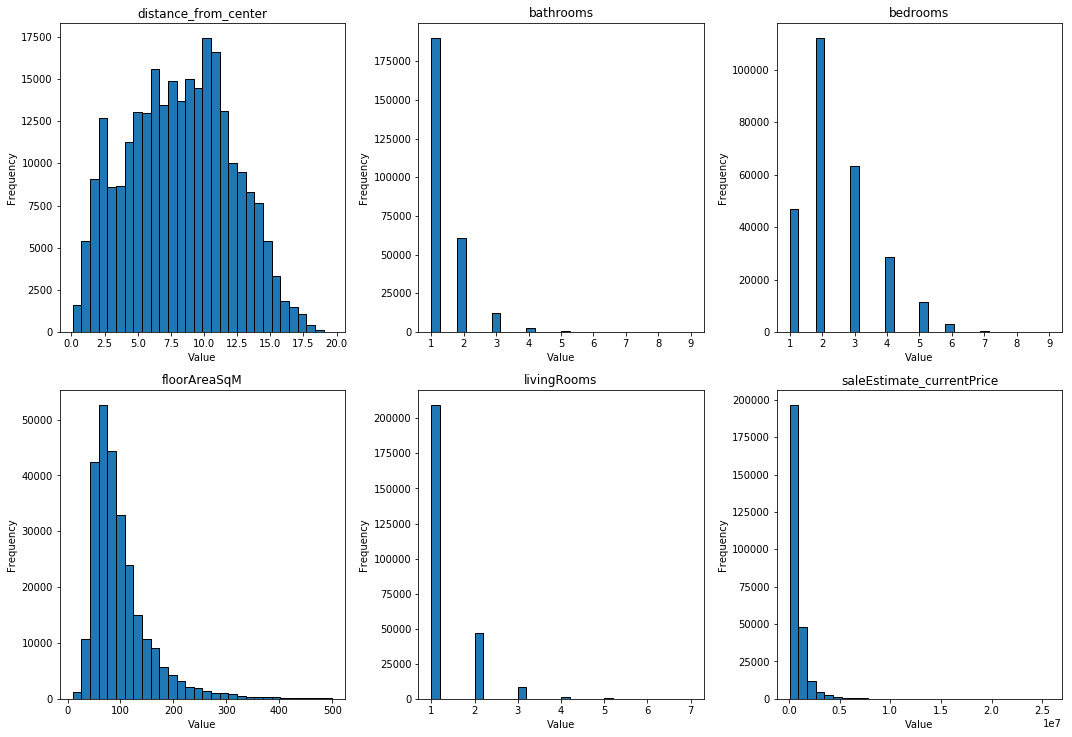

In [12]:
# Select numerical columns
numerical_columns = working_data.select_dtypes(include=['float64', 'int64']).columns

# Set the figure size
plt.figure(figsize=(15, 15))

# Loop through numerical columns and plot histograms
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i)  # Adjust the grid layout
    plt.hist(working_data[col], bins=30, edgecolor='black')
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

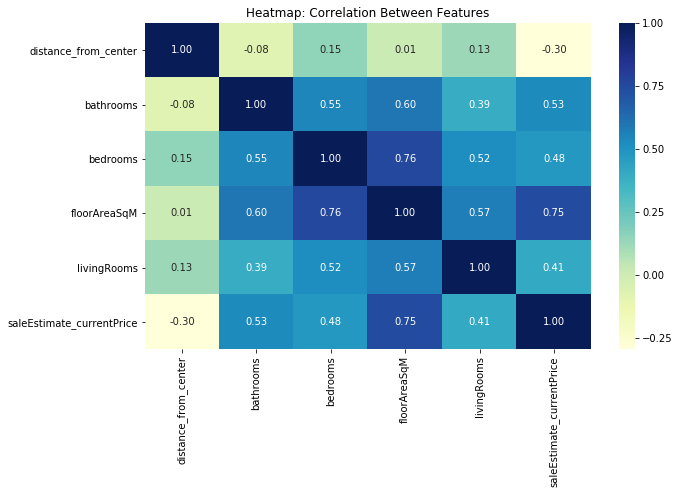

In [26]:
# Add a heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = working_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Heatmap: Correlation Between Features")
plt.show()


# # Display correlation matrix 
# correlation_matrix = data.corr()
# plt.figure(figsize=(12, 10))
# sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
# plt.title('Correlation Matrix')
# plt.show()

### Visualizing prices and areas

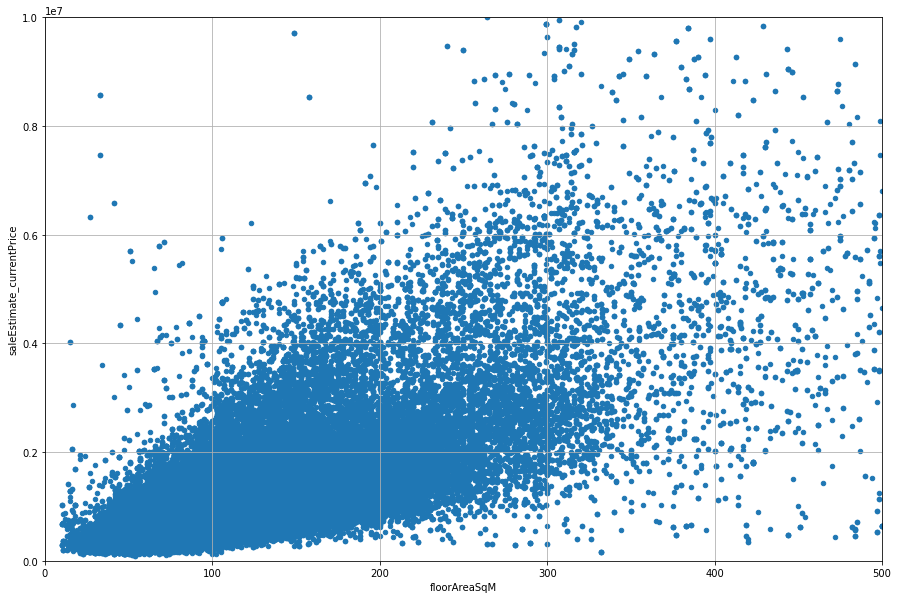

In [13]:
# Visualize the data
working_data.plot(kind='scatter', grid=True, figsize = (15, 10),
             x="floorAreaSqM", y="saleEstimate_currentPrice")
plt.axis([0, 500, 0, 10000000])
plt.show()

### Linear regression

In [14]:
from sklearn.linear_model import LinearRegression

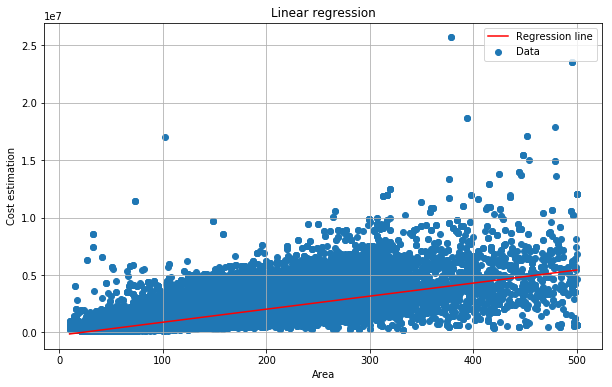

[[ 2021659.66080544]]


In [22]:
X = working_data[["floorAreaSqM"]].values
y = working_data[["saleEstimate_currentPrice"]].values

# Select a linear model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Make a diagram
plt.figure(figsize=(10, 6))

# Original data
plt.scatter(X, y, label='Data')

# Regression line
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # X values
y_pred = model.predict(x_range)  # Prediction
plt.plot(x_range, y_pred, color='red', label='Regression line')

# Настройки графика
plt.xlabel('Area')
plt.ylabel('Cost estimation')
plt.title('Linear regression')
plt.legend()
plt.grid(True)
plt.show()

# Make a prediction
X_new = [[200]]  
print(model.predict(X_new)) 

### Another way

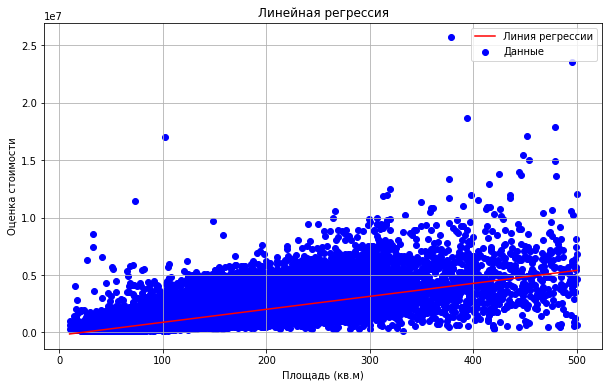

In [11]:
# Data
x = working_data['floorAreaSqM']
y = working_data['saleEstimate_currentPrice']

# Calculation of the regression coefficient
slope, intercept = np.polyfit(x, y, 1)

# Regression line
x_range = np.linspace(x.min(), x.max(), 100)  # X values
y_pred = slope * x_range + intercept          # ПPredictions

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data')  # Data points
plt.plot(x_range, y_pred, color='red', label='Regression line')  # Regression lineи
plt.xlabel('Area')
plt.ylabel('Cost estimation')
plt.title('Linear regression')
plt.legend()
plt.grid(True)
plt.show()

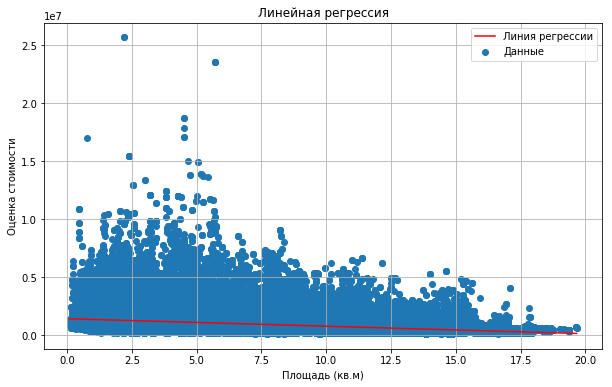

[[ 1342687.17354442]]


In [16]:
X = working_data[["distance_from_center"]].values
y = working_data[["saleEstimate_currentPrice"]].values

# Select a linear model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Make a diagram
plt.figure(figsize=(10, 6))

# Original data
plt.scatter(X, y, label='Data')

# Regression line
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # X values
y_pred = model.predict(x_range)  # Predictions
plt.plot(x_range, y_pred, color='red', label='Regression line')

# Настройки графика
plt.xlabel('Area')
plt.ylabel('Cost estimation')
plt.title('Linear regression')
plt.legend()
plt.grid(True)
plt.show()

# Make a prediction
X_new = [[1]]  
print(model.predict(X_new)) 

### Multiple regression

In [17]:
X = working_data[["floorAreaSqM", "distance_from_center", "bathrooms", "bedrooms", "livingRooms"]].values
y = working_data[["saleEstimate_currentPrice"]].values

# Select a linear model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction
X_new = [[200, 2, 1, 5, 1]]  
print(model.predict(X_new)) 

[[ 2109264.06867156]]


### Spliting data and calculating regression metrics 

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Dividing data into attributes and a target variable
X = working_data[['distance_from_center', 'floorAreaSqM','bedrooms', 'bathrooms',  'livingRooms']]
y = working_data['saleEstimate_currentPrice']

# Train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Printing data
print("Data Distribution:")
print(f"Total samples: {len(X)}")
print(f"Training samples: {len(X_train)} ({len(X_train)/len(X)*100:.2f}%)")
print(f"Testing samples: {len(X_test)} ({len(X_test)/len(X)*100:.2f}%)")

Data Distribution:
Total samples: 266633
Training samples: 213306 (80.00%)
Testing samples: 53327 (20.00%)


In [23]:
# Training the Linear Regression model
# The model learns the relationship between the features (X_train_scaled) and the target (y_train)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
# Making predictions on the test set
# Using the trained model to predict the target variable for the test data
y_pred = model.predict(X_test)

In [25]:
# Evaluating model performance
# Calculating common regression metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), and R^2 score
mae = mean_absolute_error(y_test, y_pred)  # Measures the average absolute difference between predictions and actual values
mse = mean_squared_error(y_test, y_pred)  # Measures the average squared difference between predictions and actual values
r2 = r2_score(y_test, y_pred)  # Measures how well the model explains the variance of the target variable

# Displaying the results
# Printing out the evaluation metrics to assess model performance
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 268552.1215412663
Mean Squared Error (MSE): 245996065592.6285
R^2 Score: 0.6675684470706509
